# Imports and Settings

In [ ]:
import sys
!{sys.executable} -m pip install statsmodels seaborn

In [ ]:
import copy # for deep copying objects (actually copies, not just references)
import math # for mathematical functions
import matplotlib.pyplot as plt # for plotting
import matplotlib.dates as mdates # for handling dates in plots
import matplotlib.patches as mpatches # for custom plot legends
import numpy as np # for numerical computing
import os # for operating system dependent functionality
import pandas as pd # for data manipulation
import re # for regular expressions (text processing)
import seaborn as sns # for plotting
import statsmodels.api as sm # for statistical modeling
import warnings # to manage warnings

from scipy.stats import pearsonr, spearmanr #` for correlation calculations`
warnings.simplefilter(action='ignore', category=FutureWarning) # ignore future warnings


# Filepaths

In [40]:
fp_biomarkersWide = "Data/LLM_Biomarkers_Wide.csv" # filepath for the machine learning friendly format for the Biomarker Time Series Data
fp_biomarkersLong = "Data/LLM_Biomarkers_Long.csv" # File path for the comprehensive data for the Biomarker Time Series Data
fp_microbiomeWide = "Data/LLM_Gut_Microbiome_Wide.csv" # File path for the machine learning friendly format for the Microbiome Time Series Data
fp_microbiomeLong = "Data/LLM_Gut_Microbiome_Long.csv" # File path for the comprehensive data for the Microbiome Time Series Data
fp_microbiomeSummary = "Data/LLM_Gut_Microbiome_Summary.csv" # File path for the summary data for the Microbiome Time Series Data with statistics

# Biomarkers

In [41]:
df_wideBiomarkers = pd.read_csv(fp_biomarkersWide)
df_wideBiomarkers

Date  % SCFA Acetate  % SCFA Butyrate  % SCFA Propionate  \
0    1993-05-01             NaN              NaN                NaN   
1    1996-11-27             NaN              NaN                NaN   
2    1997-05-08             NaN              NaN                NaN   
3    1998-04-15             NaN              NaN                NaN   
4    1999-04-01             NaN              NaN                NaN   
..          ...             ...              ...                ...   
327  2025-02-05            47.0             24.0               22.0   
328  2025-02-12             NaN              NaN                NaN   
329  2025-02-28             NaN              NaN                NaN   
330  2025-05-20             NaN              NaN                NaN   
331  2025-06-13             NaN              NaN                NaN   

     % SCFA Valerate  237_mg/dL  A/G ratio_None  ALT_U/L  APO A1_mg/dL  \
0                NaN        NaN             NaN      NaN           NaN   
1                NaN        NaN             1.3      NaN           NaN   
2                NaN        NaN             NaN      NaN           NaN   
3                NaN        NaN             1.4      NaN           NaN   
4                NaN        NaN             NaN      NaN           NaN   
..               ...        ...             ...      ...           ...   
327              7.2        NaN             NaN     22.0           NaN   
328              NaN        NaN             NaN     14.0           NaN   
329              NaN        NaN             NaN      NaN           NaN   
330              NaN        NaN             NaN     17.0           NaN   
331              NaN       57.0             NaN     15.0           NaN   

     APOLIPOPROTEIN-(B100)_mg/dL  ...  Uric Acid_None  VLDL Cholesterol_mg/dL  \
0                            NaN  ...             NaN                     NaN   
1                            NaN  ...             6.0                     NaN   
2                            NaN  ...             6.3                     NaN   
3                            NaN  ...             NaN                     NaN   
4                            NaN  ...             NaN                     NaN   
..                           ...  ...             ...                     ...   
327                          NaN  ...             NaN                     NaN   
328                          NaN  ...             NaN                     NaN   
329                          NaN  ...             NaN                     NaN   
330                          NaN  ...             NaN                     NaN   
331                          NaN  ...             NaN                     NaN   

     Vitamin B12_pg/mL  Vitamin D, 25-Hydroxy_ng/mL  \
0                  NaN                          NaN   
1                  NaN                          NaN   
2                  NaN                          NaN   
3                  NaN                          NaN   
4                  NaN                          NaN   
..                 ...                          ...   
327                NaN                          NaN   
328                NaN                         49.0   
329                NaN                          NaN   
330                NaN                         64.0   
331             1743.0                         69.0   

     Vitamin E Alpha-Tocopherol_mg/L  Vitamin E Gamma-Tocopherol_mg/L  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                NaN                              NaN   
4                                NaN                              NaN   
..                               ...                              ...   
327                              NaN                              NaN   
328                              NaN               

## Biomarker Time Series Summary

In [42]:
num = df_wideBiomarkers.copy() # Make a working copy so we don't mutate the original DataFrame

# Convert any non-numeric, non-datetime columns to numeric.
# - Strings (or mixed types) become numbers where possible and NaN otherwise.
# - Datetime columns are left as-is so their min/max still work.
for c in num.columns:
    if not np.issubdtype(num[c].dtype, np.number) and not np.issubdtype(num[c].dtype, np.datetime64):
        num[c] = pd.to_numeric(num[c], errors="coerce")

# Build a per-column summary table
df_colSummary = pd.DataFrame({
                                "Column": df_wideBiomarkers.columns, # Name of the column
                                "Completion": (num.notna().sum().values / len(num)).round(2), # Proportion of non-null values
                                "Max": num.max().values, # Maximum value of Biomarker
                                "Average": num.mean().values, # Average value of Biomarker
                                "Min": num.min().values, # Minimum value of Biomarker
                                "Std": num.std().values, # Standard deviation of Biomarker
                                "Data Type": df_wideBiomarkers.dtypes.values # Data Type of Biomarker
})

# Display the complete summary table
with pd.option_context("display.max_rows", None):
    display(df_colSummary.sort_values("Completion", ascending=False))

Column  Completion      Max  \
181                                         Weight_lbs        0.97   202.00   
183                                            pH_None        0.55     7.60   
139                             Stool Lactoferrin_None        0.55   899.00   
133                         Staphylococcus aureus_None        0.55     3.00   
134                    Staphylococcus epidermidis_None        0.55     1.00   
135                   Staphylococcus haemolyticus_None        0.55     2.00   
63                         Exophiala dermatitidis_None        0.55     2.00   
136                    Staphylococcus lugdunensis_None        0.55     1.00   
60                              Enterococcus spp._None        0.55     4.00   
59                           Enterobacter cloacae_None        0.55     4.00   
58                          Enterobacter asburiae_None        0.55     2.00   
56                                   E. coli spp._None        0.55     4.00   
70                                Geotrichum spp._None        0.55     3.00   
140                                Stool Lysozyme_None        0.55  3940.00   
141                                    Stool SIgA_None        0.55  1500.00   
53               Cryptococcus spp, not neoformans_None        0.55     1.00   
52                          Cryptococcus diffuens_None        0.55     1.00   
106                          Morganellla morganii_None        0.55     4.00   
50                       Corynebacterium falsenii_None        0.55     1.00   
142                       Streptococcus anginosus_None        0.55     4.00   
48                         Comamonas testosteroni_None        0.55     4.00   
69                  Gamma Hemolytic Streptococcus_None        0.55     4.00   
130                           Serratia marcescens_None        0.55     2.00   
45                   Citrobacter freundii complex_None        0.55     4.00   
116                          Providencia rettgeri_None        0.55     4.00   
98                             Lysinibacillus spp_None        0.55     3.00   
113                                   Pantoea spp_None        0.55     2.00   
94                             Lactococcus lactis_None        0.55     3.00   
93                              Lactobacillus spp_None        0.55     4.00   
1                                       % SCFA Acetate        0.55    77.00   
90   Kocuria spp, salsicia, rhizophila, kristinae_None        0.55     2.00   
89                           Klebsiella pneumonia_None        0.55     4.00   
88                             Klebsiella oxytoca_None        0.55     4.00   
117                          Providencia stuartii_None        0.55     4.00   
128             Saccharomyces cerevisiae/boulardi_None        0.55     3.00   
118                        Pseudomonas aeruginosa_None        0.55     4.00   
119                Pseudomonas chlororaphis group_None        0.55     4.00   
120                     Pseudomonas citronellolis_None        0.55     2.00   
121                          Pseudomonas stutzeri_None        0.55     2.00   
78                     Hemolytic Escherichia coli_None        0.55     4.00   
126             Rhodotorula glutinis/mucilaginosa_None        0.55     4.00   
76                                   Hafnia alvei_None        0.55     4.00   
127              Rothia dentocariosa/mucliaginosa_None        0.55     2.00   
143                       Streptococcus australis_None        0.55     3.00   
107                       Mucoid Escherichia coli_None        0.55     4.00   
144          Streptococcus mitis/oralis/cristatus_None        0.55     2.00   
19                            Arcobacter butzieri_None        0.55     2.00   
17                          Alpha hemolytic strep_None        0.55     4.00   
161                           Trichosporon asahii_None        0.55     1.00   
22                                Bacillus cereus_None        0.55     4.00   
23                 

## Explotatory Data Analysis of Time Series Data

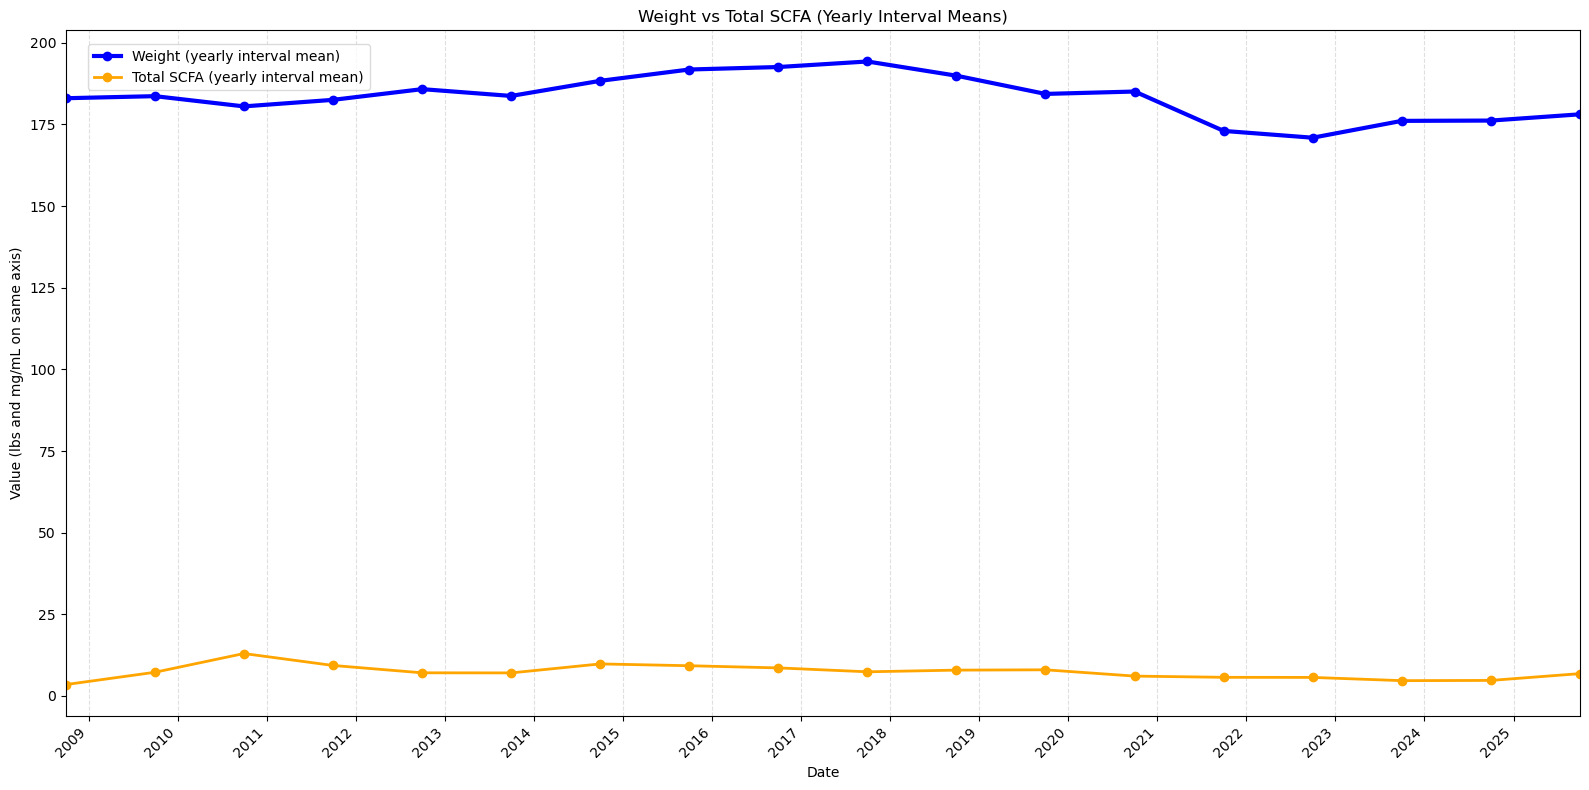

In [43]:
# Prepare data
df_plot = df_wideBiomarkers.dropna(subset=["Total SCFA_mg/mL"]).copy() # drop rows where Total SCFA is NaN
df_plot["Date"] = pd.to_datetime(df_plot["Date"]) # convert Date column to datetime
df_plot = df_plot.set_index("Date").sort_index() # set Date as index and sort

# resample into 12-month bins, take mean within each bin
df_1y = df_plot[["Weight_lbs", "Total SCFA_mg/mL"]].resample("12M").mean().reset_index()

# variable to plot
x_time_1y   = df_1y["Date"] # Date
y_weight_1y = df_1y["Weight_lbs"] # Weight
y_scfa_1y   = df_1y["Total SCFA_mg/mL"] # Total SCFA

# plot (single y-axis
fig, ax = plt.subplots(figsize=(16, 8)) # plot size

# Weight (yearly interval mean)
l1, = ax.plot(
                x_time_1y, 
                y_weight_1y,
                marker="o", 
                linewidth=3, 
                color="blue",
                label="Weight (yearly interval mean)"
)

# Total SCFA (yearly interval mean) — SAME AXIS
l2, = ax.plot(
                x_time_1y, 
                y_scfa_1y,
                marker="o", 
                linewidth=2, 
                color="orange",
                label="Total SCFA (yearly interval mean)"
)

# Titles, labels, formatting, axis, and legend
ax.set_title("Weight vs Total SCFA (Yearly Interval Means)")
ax.set_xlabel("Date")
ax.set_ylabel("Value (lbs and mg/mL on same axis)")
leg = ax.legend(loc="upper left", bbox_to_anchor=(0.01, 0.99), frameon=True)
leg.get_frame().set_edgecolor("lightgray")
leg.get_frame().set_linewidth(1)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(axis="x", linestyle="--", alpha=0.4)
locator = mdates.YearLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
for t in ax.get_xticklabels():  # Rotate labels for readablity
    t.set_rotation(45)
    t.set_horizontalalignment("right")
ax.margins(x=0)

plt.tight_layout()
plt.show()

Kinda underwhelming huh? Not very interesting, lets see if we can make a more useful one...

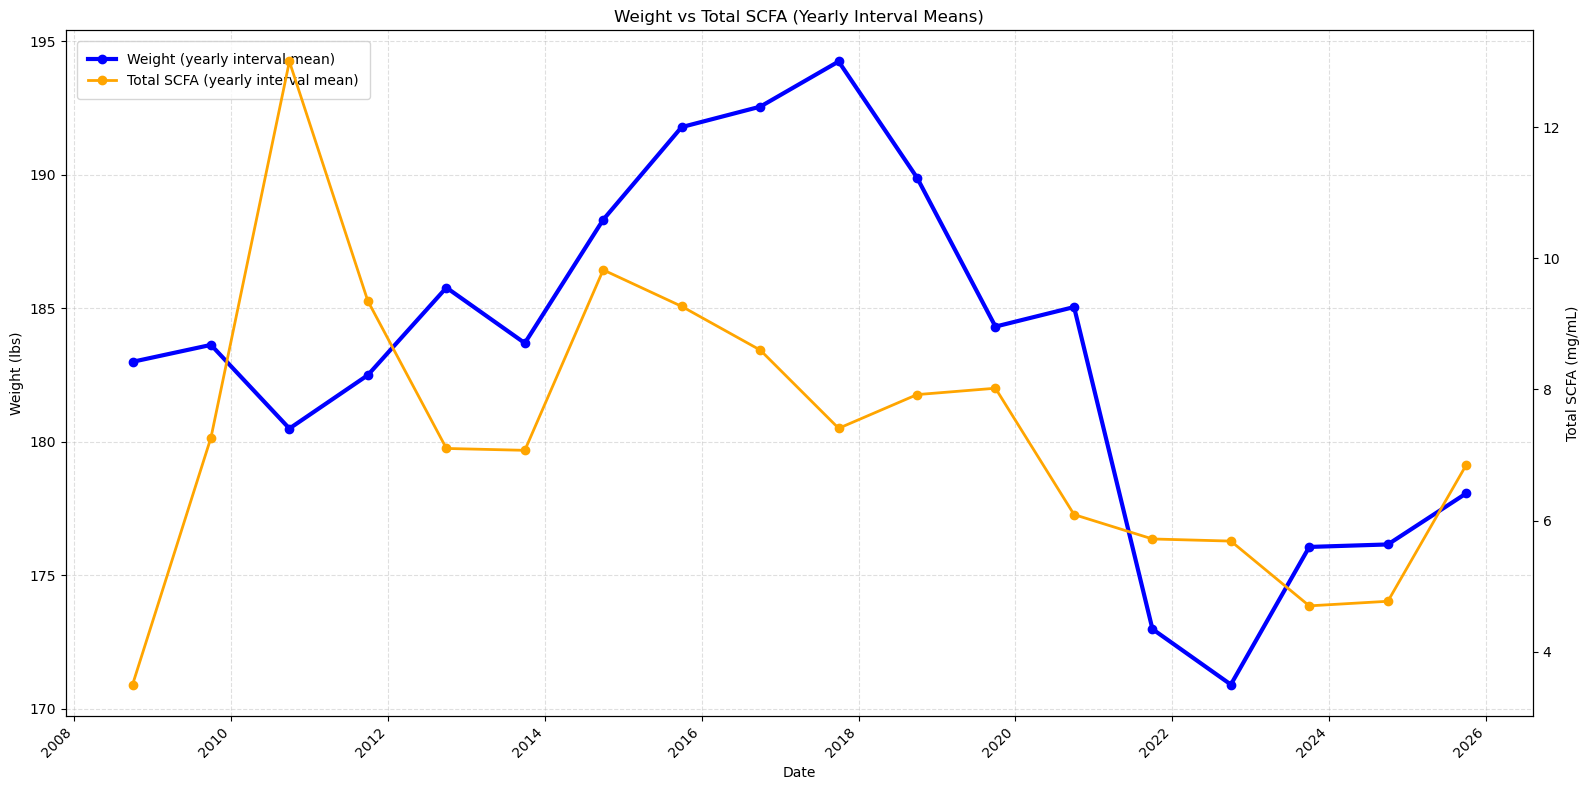

In [44]:

# Prepare data 
df_plot = df_wideBiomarkers.dropna(subset=["Total SCFA_mg/mL"]).copy()
df_plot["Date"] = pd.to_datetime(df_plot["Date"])
df_plot = df_plot.set_index("Date").sort_index()

# Yearly windows
# resample into 12-month bins, take mean within each bin
df_1y = df_plot[["Weight_lbs", "Total SCFA_mg/mL"]].resample("12M").mean().reset_index()

# variables 
x_time_1y   = df_1y["Date"]
y_weight_1y = df_1y["Weight_lbs"]
y_scfa_1y   = df_1y["Total SCFA_mg/mL"]

# Matplotlib plot, dual y-axes
fig, ax1 = plt.subplots(figsize=(16, 8))

# Weight (left axis)
ln1 = ax1.plot(
                x_time_1y, 
                y_weight_1y,
                marker="o", 
                linewidth=3, 
                label="Weight (yearly interval mean)", 
                color="blue"
)
ax1.set_ylabel("Weight (lbs)")
ax1.set_xlabel("Date")

# SCFA (right axis)
ax2 = ax1.twinx()
ln2 = ax2.plot(
                x_time_1y, 
                y_scfa_1y,
                marker="o", 
                linewidth=2, 
                label="Total SCFA (yearly interval mean)", 
                color="orange"
)
ax2.set_ylabel("Total SCFA (mg/mL)")

# Title
ax1.set_title("Weight vs Total SCFA (Yearly Interval Means)")

# Date formatting (readable ticks)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

# Grid on primary axis
ax1.grid(True, axis="both", linestyle="--", alpha=0.4)

# Combined legend
handles = ln1 + ln2
labels = [h.get_label() for h in handles]
leg = ax1.legend(handles, labels, loc="upper left", frameon=True, borderpad=0.8, borderaxespad=0.8)

plt.tight_layout()
plt.show()

This is interesting, jagged edges may mean some noise, lets see if we can find a better signal with a rolling windown

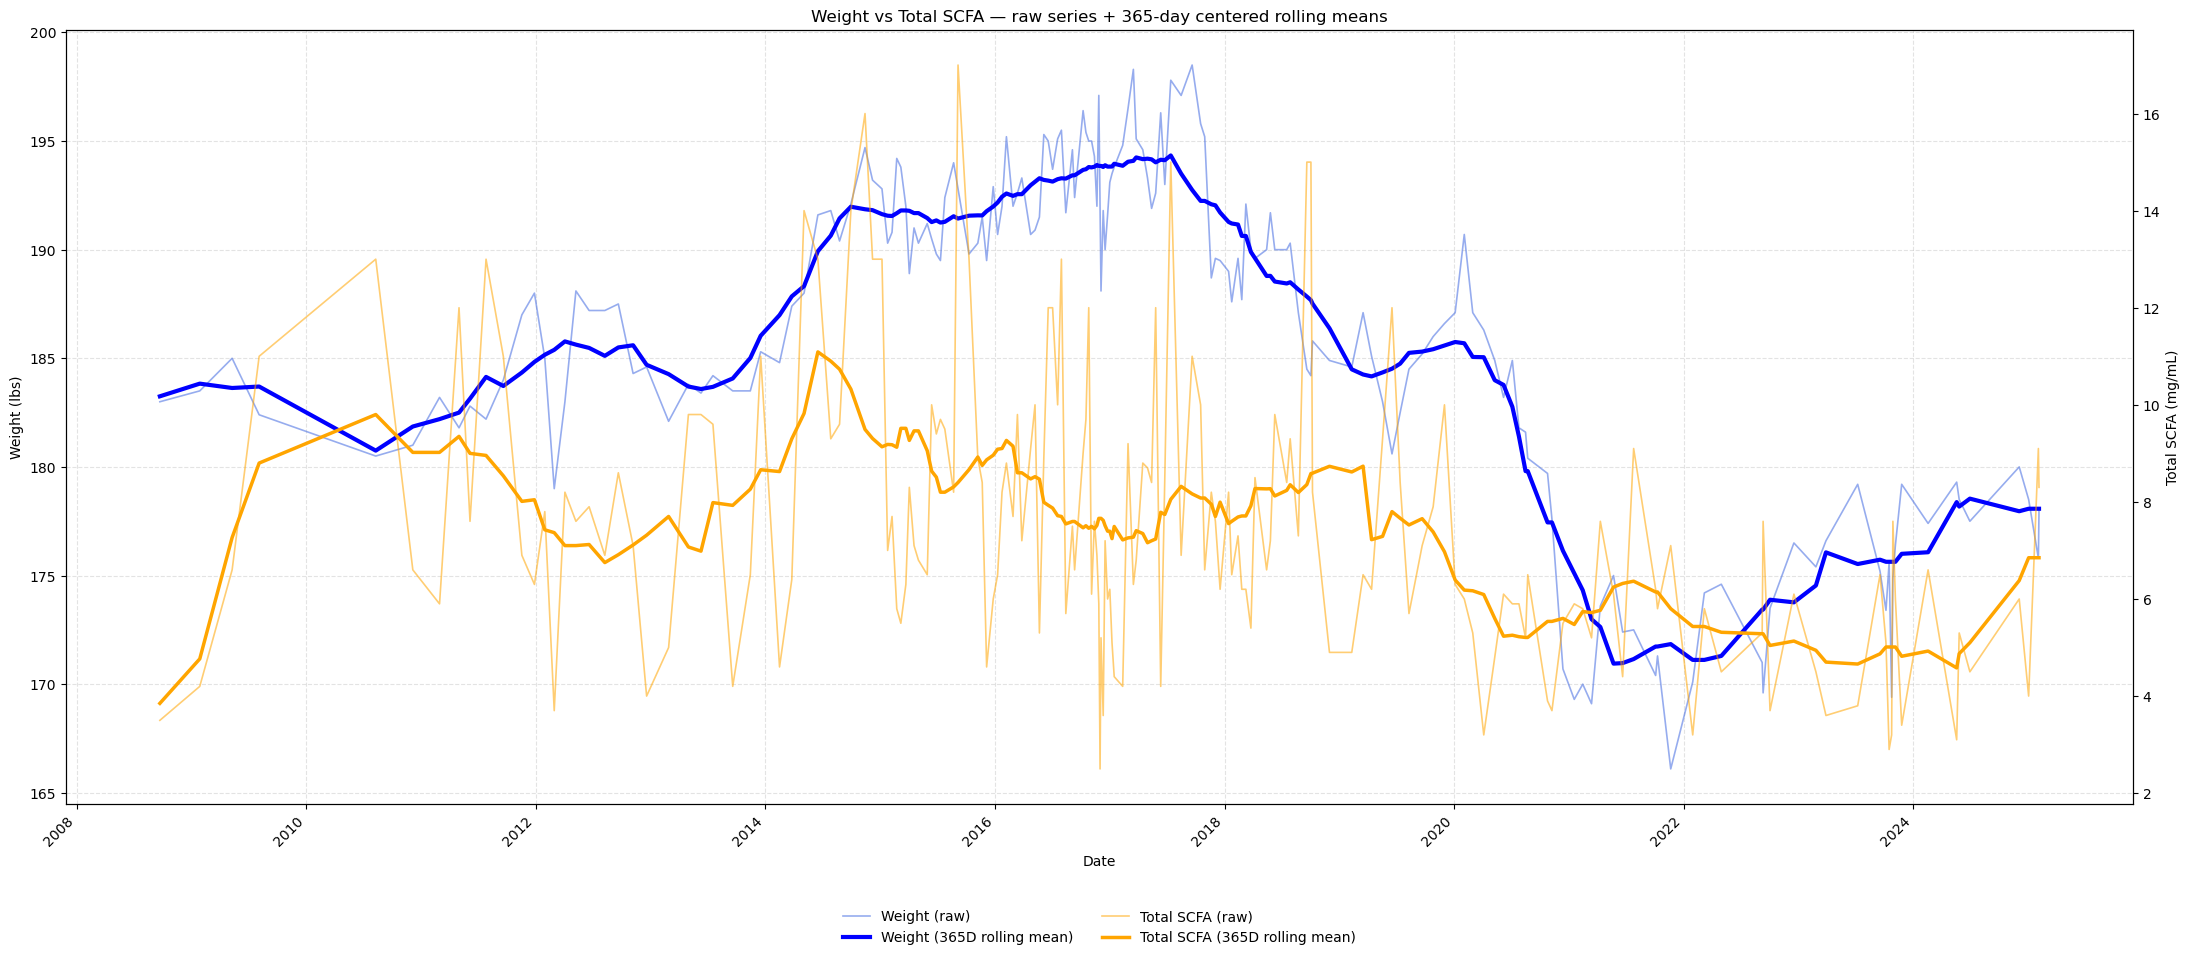

In [45]:
# data prep
df_plot = df_wideBiomarkers.dropna(subset=["Total SCFA_mg/mL"]).copy()
df_plot["Date"] = pd.to_datetime(df_plot["Date"], errors="coerce")
df_plot["Weight_lbs"] = pd.to_numeric(df_plot["Weight_lbs"], errors="coerce")
df_plot["Total SCFA_mg/mL"] = pd.to_numeric(df_plot["Total SCFA_mg/mL"], errors="coerce")
df_plot = df_plot.sort_values("Date").set_index("Date")

# optional monthly, not required for rolling, but interesting to see
monthly = df_plot[["Weight_lbs", "Total SCFA_mg/mL"]].resample("1M").mean()

# 1-year rolling means 
roll = (
        df_plot[["Weight_lbs", "Total SCFA_mg/mL"]]
        .rolling(window="365D", center=True, min_periods=1)
        .mean()
)

w_raw = df_plot["Weight_lbs"].dropna()
s_raw = df_plot["Total SCFA_mg/mL"].dropna()
w_roll = roll["Weight_lbs"].dropna()
s_roll = roll["Total SCFA_mg/mL"].dropna()

# plot 
fig, ax1 = plt.subplots(figsize=(22, 10))

# RAW Weight (left axis) thin, semi-transparent
l0, = ax1.plot(
                w_raw.index, 
                w_raw.values, 
                linewidth=1.2, 
                alpha=0.55,
                color="royalblue", 
                label="Weight (raw)"
                )

# Rolling Weight (left axis) — bold
l1, = ax1.plot(
               w_roll.index, 
               w_roll.values, 
               linewidth=3.0,
               color="blue", 
               label="Weight (365D rolling mean)"
               )

ax1.set_ylabel("Weight (lbs)")
ax1.set_xlabel("Date")
ax1.grid(True, axis="both", linestyle="--", alpha=0.35)

# RAW SCFA (right axis) 
ax2 = ax1.twinx()
l2, = ax2.plot(
                s_raw.index, 
                s_raw.values, 
                linewidth=1.2, 
                alpha=0.55,
                color="#FFA500", 
                label="Total SCFA (raw)"
                )

# Rolling SCFA (right axis) — bold
l3, = ax2.plot(
              s_roll.index, 
              s_roll.values, 
              linewidth=2.5,
              color="orange", 
              label="Total SCFA (365D rolling mean)"
              )

ax2.set_ylabel("Total SCFA (mg/mL)")

# dates & legend
ax1.set_title("Weight vs Total SCFA — raw series + 365-day centered rolling means")
loc = mdates.AutoDateLocator()
ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(loc))
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

# single combined legend (outside, below)
handles = [l0, l1, l2, l3]
labels  = [h.get_label() for h in handles]
ax1.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, -0.12),
           ncol=2, frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

Woah, looks like we have a signal here, lets try a few different rolling windows and some associatied correlation stats...

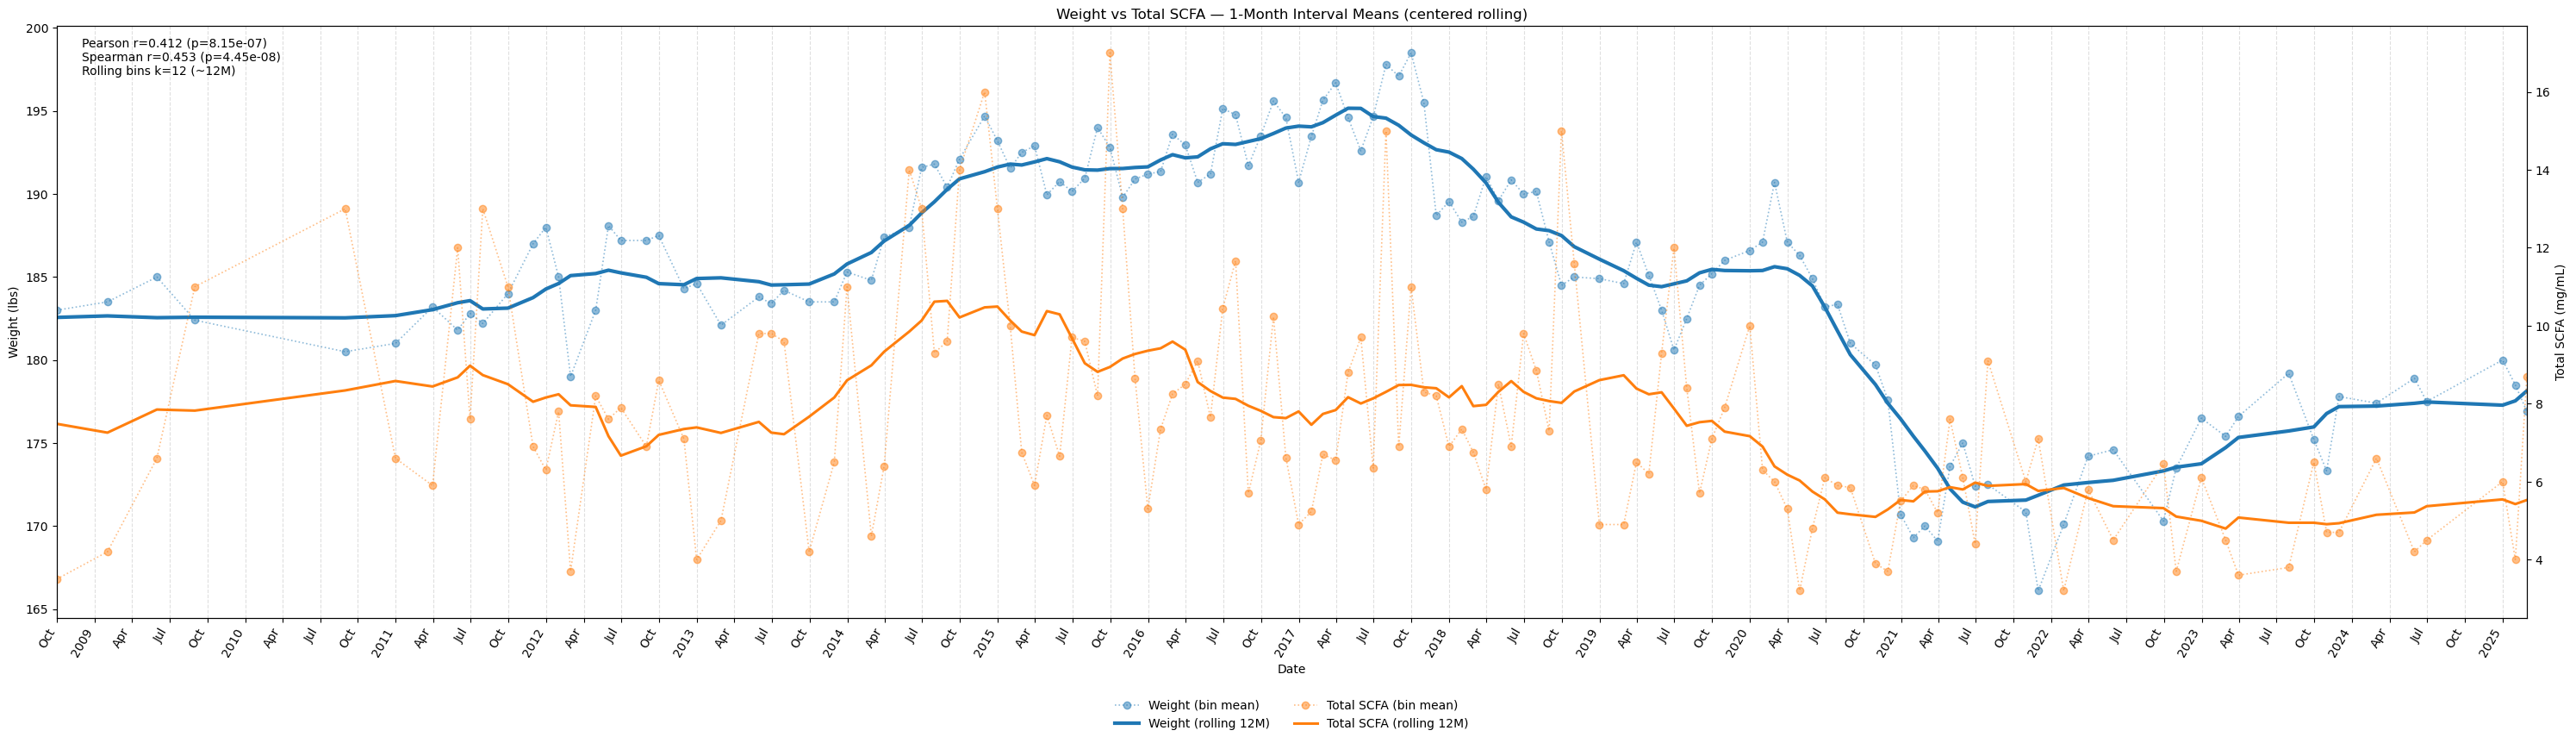

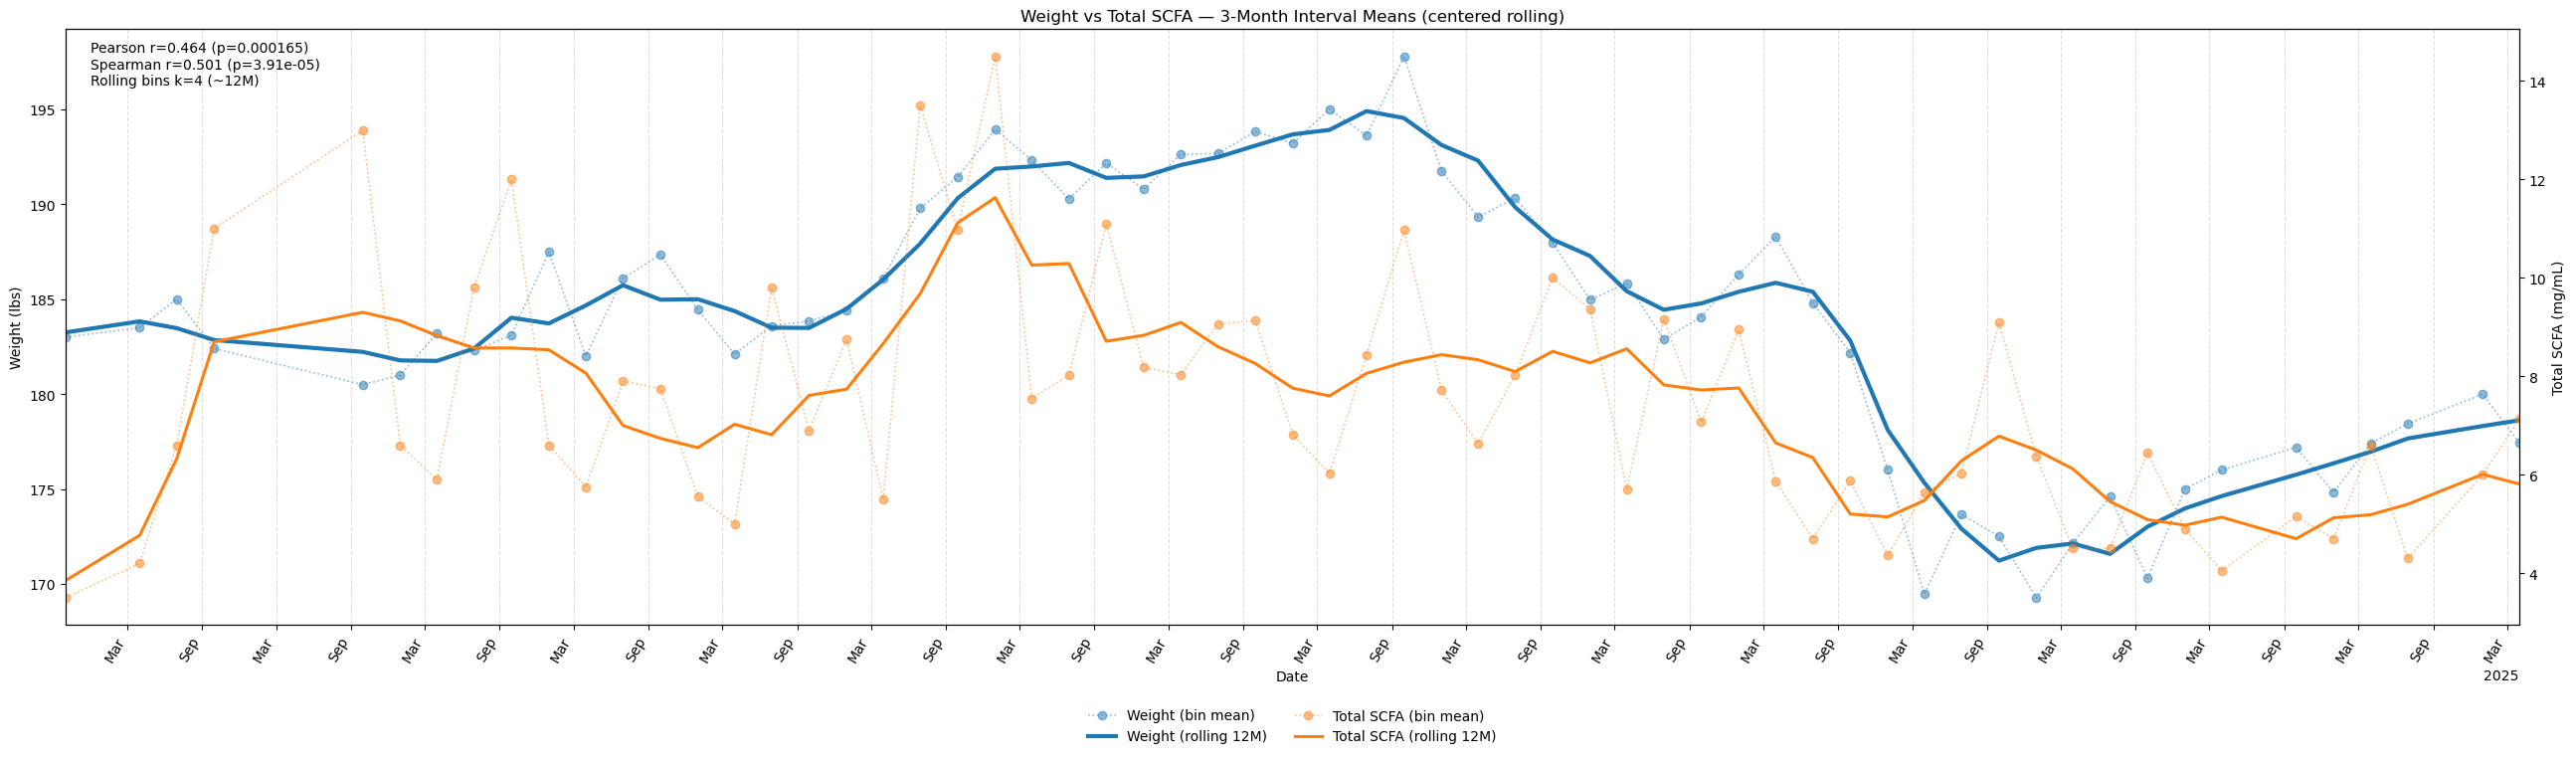

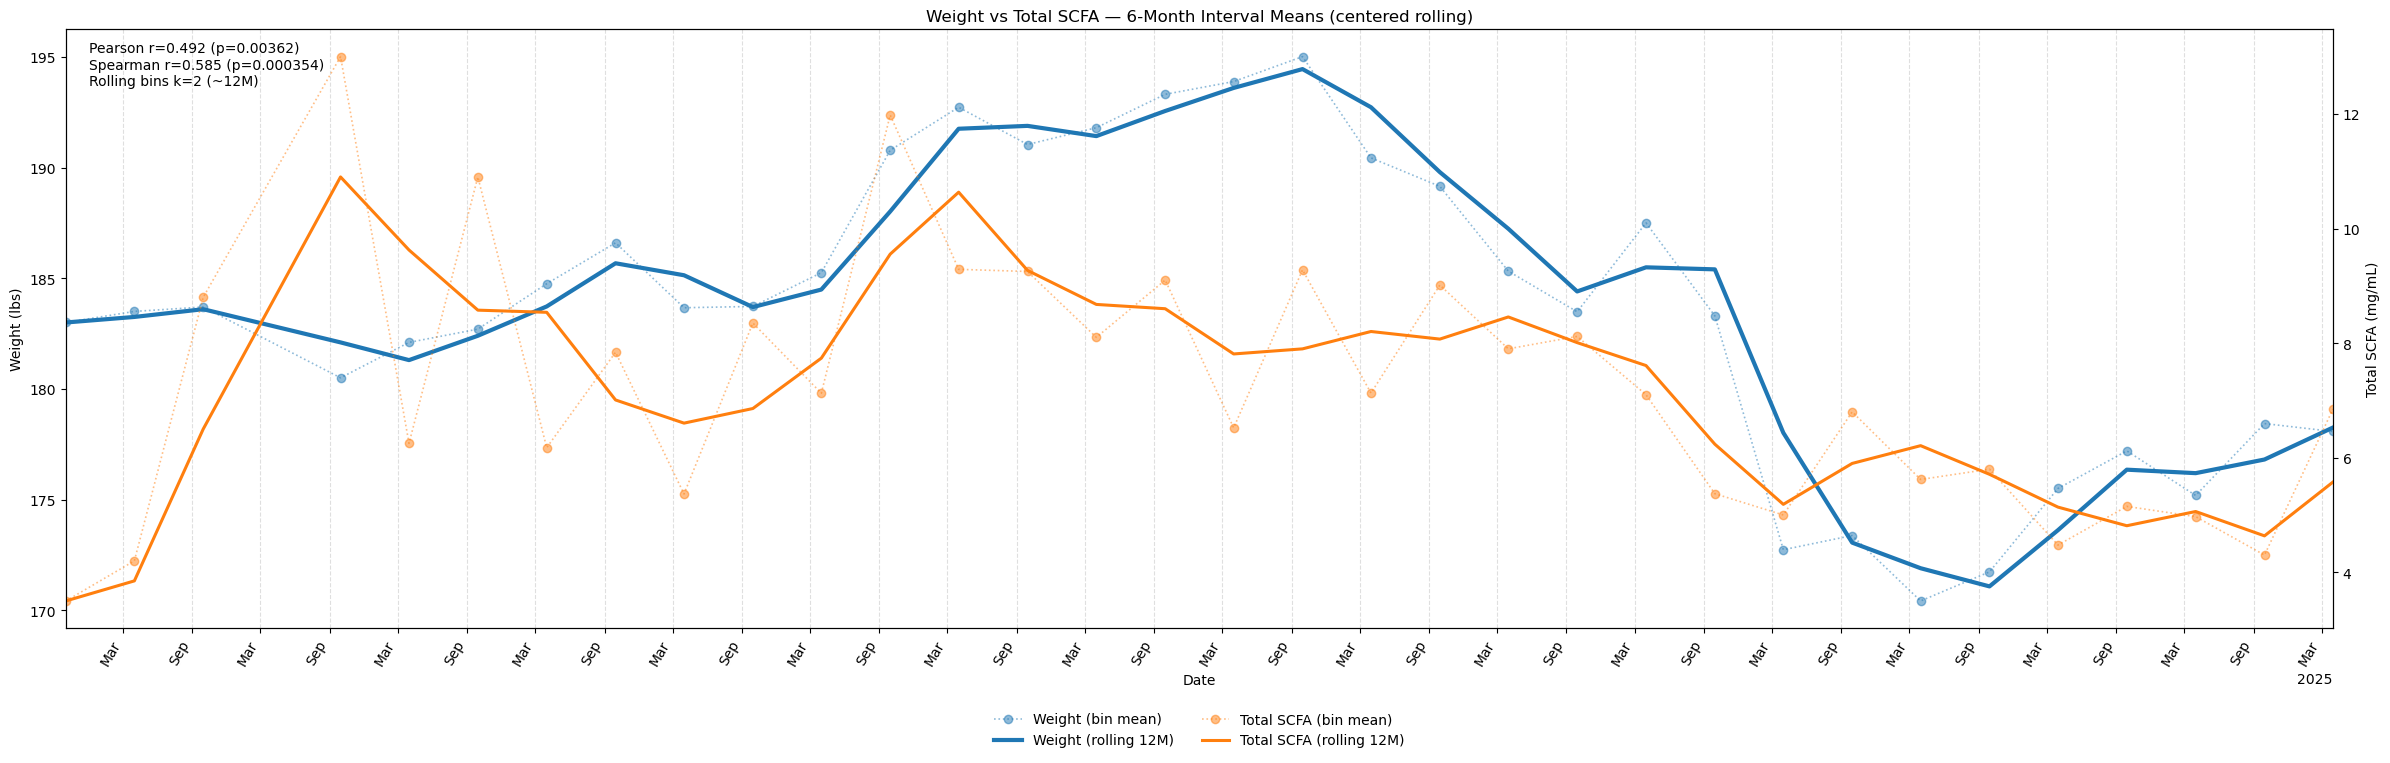

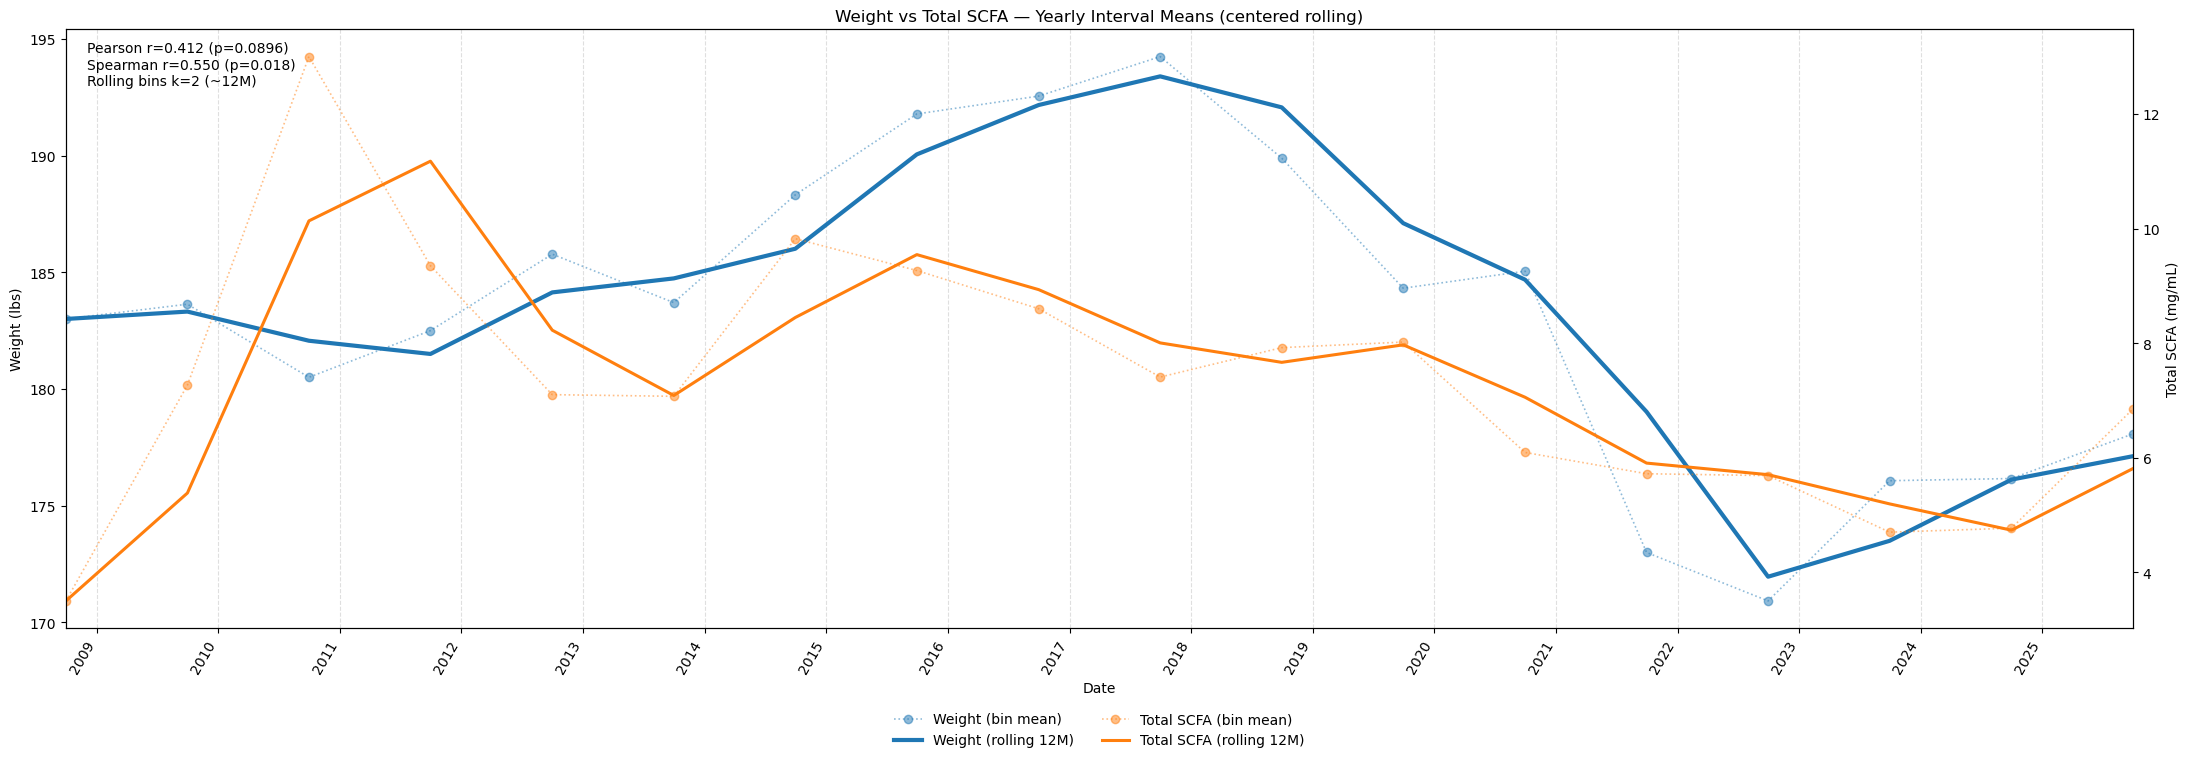

  Interval  N bins  Pearson r Pearson p  Spearman r Spearman p
0  1-Month     133      0.412  8.15e-07       0.453   4.45e-08
1  3-Month      61      0.464  0.000165       0.501   3.91e-05
2  6-Month      33      0.492   0.00362       0.585   0.000354
3   Yearly      18      0.412    0.0896       0.550      0.018


In [46]:
# data prep 
df_plot = df_wideBiomarkers.dropna(subset=["Total SCFA_mg/mL"]).copy()
df_plot["Date"] = pd.to_datetime(df_plot["Date"], errors="coerce")
df_plot["Weight_lbs"] = pd.to_numeric(df_plot["Weight_lbs"], errors="coerce")
df_plot["Total SCFA_mg/mL"] = pd.to_numeric(df_plot["Total SCFA_mg/mL"], errors="coerce")
df_plot = df_plot.sort_values("Date").set_index("Date")

# keep all intervals, but make 1M readable via tick thinning + rotation
intervals = [
                ("1M",  "1-Month"),
                ("3M",  "3-Month"),
                ("6M",  "6-Month"),
                ("12M", "Yearly"),
]

# rolling span in MONTHS 
ROLLING_MONTHS = 12
results = []
for rule, label in intervals:
    # resample to interval bins (non-overlapping), take mean within each bin
    df_bin = df_plot[["Weight_lbs", "Total SCFA_mg/mL"]].resample(rule).mean().dropna()

    if df_bin.empty or len(df_bin) < 2:
        continue

    x_time   = df_bin.index
    y_weight = df_bin["Weight_lbs"]
    y_scfa   = df_bin["Total SCFA_mg/mL"]

    # centered rolling over bins
    # convert months to number of bins for this interval
    months_per_bin = {"1M": 1, "3M": 3, "6M": 6, "12M": 12}[rule]
    # ensure at least 2 bins so the rolling line is distinct (fixes "Yearly" case)
    k = max(2, int(np.ceil(ROLLING_MONTHS / months_per_bin)))
    y_weight_roll = y_weight.rolling(window=k, center=True, min_periods=1).mean()
    y_scfa_roll   = y_scfa.rolling(  window=k, center=True, min_periods=1).mean()

    # quick stats on raw binned series
    if len(df_bin) >= 3:
        pr, pp = pearsonr(y_weight, y_scfa)
        sr, sp = spearmanr(y_weight, y_scfa)
    else:
        pr = pp = sr = sp = np.nan

    results.append({
                        "Interval": label,
                        "N bins": len(df_bin),
                        "Pearson r": (np.round(pr, 3) if np.isfinite(pr) else pr),
                        "Pearson p": (f"{pp:.3g}" if np.isfinite(pp) else pp),
                        "Spearman r": (np.round(sr, 3) if np.isfinite(sr) else sr),
                        "Spearman p": (f"{sp:.3g}" if np.isfinite(sp) else sp),
                    })

    # plotting
    # figure size & tick locator
    if rule == "1M":
        figsize = (30, 9); locator = mdates.MonthLocator(interval=3)
    elif rule == "3M":
        figsize = (26, 8); locator = mdates.MonthLocator(interval=6)
    elif rule == "6M":
        figsize = (24, 8); locator = mdates.MonthLocator(interval=6)
    else:  # "12M"
        figsize = (22, 8); locator = mdates.YearLocator()

    fig, ax1 = plt.subplots(figsize=figsize)

    # Weight (left axis): raw bins (dotted) + rolling (solid)
    l1,  = ax1.plot(
                    x_time, 
                    y_weight, 
                    marker="o", 
                    linestyle=":", 
                    linewidth=1.2,
                    alpha=0.5, 
                    label="Weight (bin mean)", 
                    color="tab:blue"
                    )

    l1r, = ax1.plot(
                    x_time, 
                    y_weight_roll, 
                    linewidth=3,
                    label=f"Weight (rolling {ROLLING_MONTHS}M)",
                    color="tab:blue"
                    )

    # SCFA (right axis): raw bins (dotted) + rolling (solid)
    ax2 = ax1.twinx()
    l2,  = ax2.plot(
                    x_time, 
                    y_scfa, 
                    marker="o", 
                    linestyle=":", 
                    linewidth=1.2,
                    alpha=0.5, 
                    label="Total SCFA (bin mean)", 
                    color="tab:orange"
                    )
    l2r, = ax2.plot(
                    x_time, 
                    y_scfa_roll, 
                    linewidth=2.2,
                    label=f"Total SCFA (rolling {ROLLING_MONTHS}M)", 
                    color="tab:orange"
                    )

    # axes, labels, grid
    ax1.set_title(f"Weight vs Total SCFA — {label} Interval Means (centered rolling)")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Weight (lbs)")
    ax2.set_ylabel("Total SCFA (mg/mL)")

    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
    
    for tick in ax1.get_xticklabels():
        tick.set_rotation(60)
        tick.set_horizontalalignment("right")

    ax1.grid(axis="x", linestyle="--", alpha=0.4)
    ax1.margins(x=0)

    # legend outside, centered under plot
    handles = [l1, l1r, l2, l2r]
    labels  = [h.get_label() for h in handles]
    ax1.legend(
                handles, 
                labels,
               loc="upper center", 
               bbox_to_anchor=(0.5, -0.12),
               ncol=2, 
               frameon=False
               )

    # stats box
    if np.isfinite(pr):
        ax1.text(0.01, 0.98,
                 f"Pearson r={pr:.3f} (p={pp:.3g})\n"
                 f"Spearman r={sr:.3f} (p={sp:.3g})\n"
                 f"Rolling bins k={k} (~{ROLLING_MONTHS}M)",
                 transform=ax1.transAxes, va="top", ha="left", fontsize=10)

    plt.tight_layout(rect=[0, 0.03, 1, 1])
    plt.show()

# summary table 
df_results = pd.DataFrame(
    results,
    columns=["Interval", "N bins", "Pearson r", "Pearson p", "Spearman r", "Spearman p"]
)
print(df_results)

These look pretty good, especially the 3-month, and I like the spearman correlation, pretty strong for 1 variable of something as complx as weight. 

Perhaps there is a more decisive test we can use to establish the strangth of this relationship beyond correlation

Also, here is the long format that is harder to see things with but retains more of the data

In [52]:
df_longBiomarkers = pd.read_csv(fp_biomarkersLong)
df_longBiomarkers

Date                   Biomarker  Value     Units  \
0      1993-05-01       Sum Total Cholesterol  152.0     mg/dL   
1      1996-11-27                   A/G ratio    1.3       NaN   
2      1996-11-27                         AST   37.0       U/L   
3      1996-11-27                     Albumin    4.2      g/dL   
4      1996-11-27        Alkaline phosphatase   64.0       U/L   
...           ...                         ...    ...       ...   
22857  2025-06-13       Vitamin D, 25-Hydroxy     69     ng/mL   
22858  2025-06-13  Vitamin E Alpha-Tocopherol    7.9      mg/L   
22859  2025-06-13  Vitamin E Gamma-Tocopherol    0.6      mg/L   
22860  2025-06-13                        WBC-    4.4  10**3/mL   
22861  2025-06-13                      Weight  180.8       lbs   

                                          Panel   GoodRange  Facility  
0                                   LIPID Panel        <199       NaN  
1                 Comprehensive Metabolic Panel     1.1-2.3       NaN  
2                 Comprehensive Metabolic Panel        0-40       NaN  
3                 Comprehensive Metabolic Panel  3.5 to 5.2       NaN  
4                 Comprehensive Metabolic Panel   40 to 120       NaN  
...                                         ...         ...       ...  
22857  Vitamins, Antioxidants, Amino Acid Panel       30-80       NaN  
22858  Vitamins, Antioxidants, Amino Acid Panel      5.5-18       NaN  
22859  Vitamins, Antioxidants, Amino Acid Panel         0-6       NaN  
22860             CBC: White Blood Cell Details     4 to 10       NaN  
22861                                    Vitals         NaN       NaN  

[22862 rows x 7 columns]

Maybe some of this information can be used as well...

Now that we have seen the biomarkers data lets take a look at the microbiome data.



# Microbiome Data

## Wide Format

Here is the wide format, useful for machine learning and data science...

In [53]:
df_wideMicrobiome = pd.read_csv(fp_microbiomeWide)
df_wideMicrobiome

Species  12/28/11  4/3/12  \
0                          Adlercreutzia_equolifaciens     0.031   0.035   
1                               Aeromonas_unclassified     0.000   0.000   
2                               Aggregatibacter_segnis     0.000   0.000   
3                         Aggregatibacter_unclassified     0.000   0.000   
4                              Akkermansia_muciniphila    12.328   0.950   
..                                                 ...       ...     ...   
224  p__Proteobacteria;f__Pasteurellaceae;g__Aggreg...     0.000   0.000   
225  p__Proteobacteria;f__Pseudomonadaceae;g__Pseud...     0.000   0.010   
226  p__Synergistetes;f__Synergistaceae;g__Synergistes     0.100   0.000   
227                             p__Tenericutes;f__;g__     0.990   0.000   
228  p__Verrucomicrobia;f__Verrucomicrobiaceae;g__A...    14.770   0.850   

     8/7/12  11/6/12  1/26/13  2/8/13  2/5/13  3/24/13  4/7/13  ...  4/14/19  \
0     0.143    0.064    0.041   0.036     NaN    0.008   0.006  ...      NaN   
1     0.000    0.000    0.000   0.000     NaN    0.000   0.000  ...      NaN   
2     0.000    0.000    0.000   0.014     NaN    0.015   0.562  ...      NaN   
3     0.000    0.000    0.000   0.000     NaN    0.000   0.137  ...      NaN   
4     3.842    5.579    3.518   3.212     NaN    1.063   0.892  ...      NaN   
..      ...      ...      ...     ...     ...      ...     ...  ...      ...   
224   0.000    0.000    0.000   0.040    0.29    0.030   1.030  ...     0.00   
225   0.000    0.010    0.010   0.010    0.01    0.010   0.030  ...     0.02   
226   0.020    0.050    0.110   0.040    0.12    0.010   0.020  ...     0.07   
227   0.010    0.030    0.160   0.110    0.05    0.350   0.160  ...     0.64   
228   4.130    5.670    3.120   2.460    6.58    0.490   0.490  ...     2.88   

     4/28/19  5/12/19  5/19/19  6/2/19  6/16/19  6/23/19  7/14/19  7/28/19  \
0        NaN      NaN      NaN     NaN      NaN      NaN      NaN      NaN   
1        NaN      NaN      NaN     NaN      NaN      NaN      NaN      NaN   
2        NaN      NaN      NaN     NaN      NaN      NaN      NaN      NaN   
3        NaN      NaN      NaN     NaN      NaN      NaN      NaN      NaN   
4        NaN      NaN      NaN     NaN      NaN      NaN      NaN      NaN   
..       ...      ...      ...     ...      ...      ...      ...      ...   
224     0.00     0.00     0.00    0.00     0.00     0.00     0.00     0.00   
225     0.00     0.10     0.10    0.33     0.09     0.00     0.09     0.08   
226     0.03     0.06     0.01    0.00     0.00     0.03     0.05     0.11   
227     0.50     0.22     0.33    0.39     0.39     0.40     0.27     0.16   
228     4.43     1.29     3.73    3.96     1.19     0.97     0.66     5.50   

     8/11/19  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
..       ...  
224     0.00  
225     0.06  
226     0.03  
227     0.58  
228     1.60  

[229 rows x 160 columns]

## Long Format

Here is the long version, which contains more information

In [54]:
df_longMicrobiome = pd.read_csv(fp_microbiomeLong)
df_longMicrobiome

Date                                            Species  Abundance  \
0      12/28/11                        Adlercreutzia_equolifaciens      0.031   
1      12/28/11                             Aeromonas_unclassified      0.000   
2      12/28/11                             Aggregatibacter_segnis      0.000   
3      12/28/11                       Aggregatibacter_unclassified      0.000   
4      12/28/11                            Akkermansia_muciniphila     12.328   
...         ...                                                ...        ...   
15820   8/11/19  p__Proteobacteria;f__Pasteurellaceae;g__Aggreg...      0.000   
15821   8/11/19  p__Proteobacteria;f__Pseudomonadaceae;g__Pseud...      0.060   
15822   8/11/19  p__Synergistetes;f__Synergistaceae;g__Synergistes      0.030   
15823   8/11/19                             p__Tenericutes;f__;g__      0.580   
15824   8/11/19  p__Verrucomicrobia;f__Verrucomicrobiaceae;g__A...      1.600   

                                   Panel          DominantSpecies  \
0      Xin Fang MetaphlAN 2 Metagenomics                      NaN   
1      Xin Fang MetaphlAN 2 Metagenomics                      NaN   
2      Xin Fang MetaphlAN 2 Metagenomics                      NaN   
3      Xin Fang MetaphlAN 2 Metagenomics                      NaN   
4      Xin Fang MetaphlAN 2 Metagenomics                      NaN   
...                                  ...                      ...   
15820                                16S                      NaN   
15821                                16S                      NaN   
15822                                16S                      NaN   
15823                                16S                      NaN   
15824                                16S  Akkermansia_muciniphila   

       HealthyAverage  HealthyMax  
0                 NaN         NaN  
1                 NaN         NaN  
2                 NaN         NaN  
3                 NaN         NaN  
4            0.984429       8.439  
...               ...         ...  
15820             NaN         NaN  
15821             NaN         NaN  
15822             NaN         NaN  
15823             NaN         NaN  
15824             NaN         NaN  

[15825 rows x 7 columns]

## Summary Stats

Here are some more comphrensive statitics that could be helpful...

* Sum16S — Percent of the sample accounted for by your 16S table. ~100% means near-complete coverage; 97–99% usually means some low-abundance or omitted taxa.

* SumMetagenomics — Same idea as Sum16S but for the shotgun metagenomics table. NaN means no shotgun sample for that date.

* Shannon16S — A diversity score from the 16S data; higher = more diverse and/or more even communities.

In [49]:
df_summaryMicrobiome = pd.read_csv(fp_microbiomeSummary)
df_summaryMicrobiome

Date  Sum16S  SumMetagenomics  Shannon16S
0    12/28/11   97.15           99.957       5.444
1      4/3/12   97.89           99.985       4.633
2      8/7/12   97.98           99.965       5.997
3     11/6/12   98.39           99.983       5.244
4     1/26/13   97.89           99.987       6.235
..        ...     ...              ...         ...
154   6/16/19   99.06              NaN       6.082
155   6/23/19   99.10              NaN       5.596
156   7/14/19   99.00              NaN       6.007
157   7/28/19   98.52              NaN       6.133
158   8/11/19   99.32              NaN       6.122

[159 rows x 4 columns]

## 16S Microbiome Relative Abundance Stacked Area Chart

/var/folders/nf/dp5pbtr55rn8mww76lsrkt800000gn/T/ipykernel_79974/754061062.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_longMicrobiome["Date"] = pd.to_datetime(df_longMicrobiome["Date"], errors="coerce")


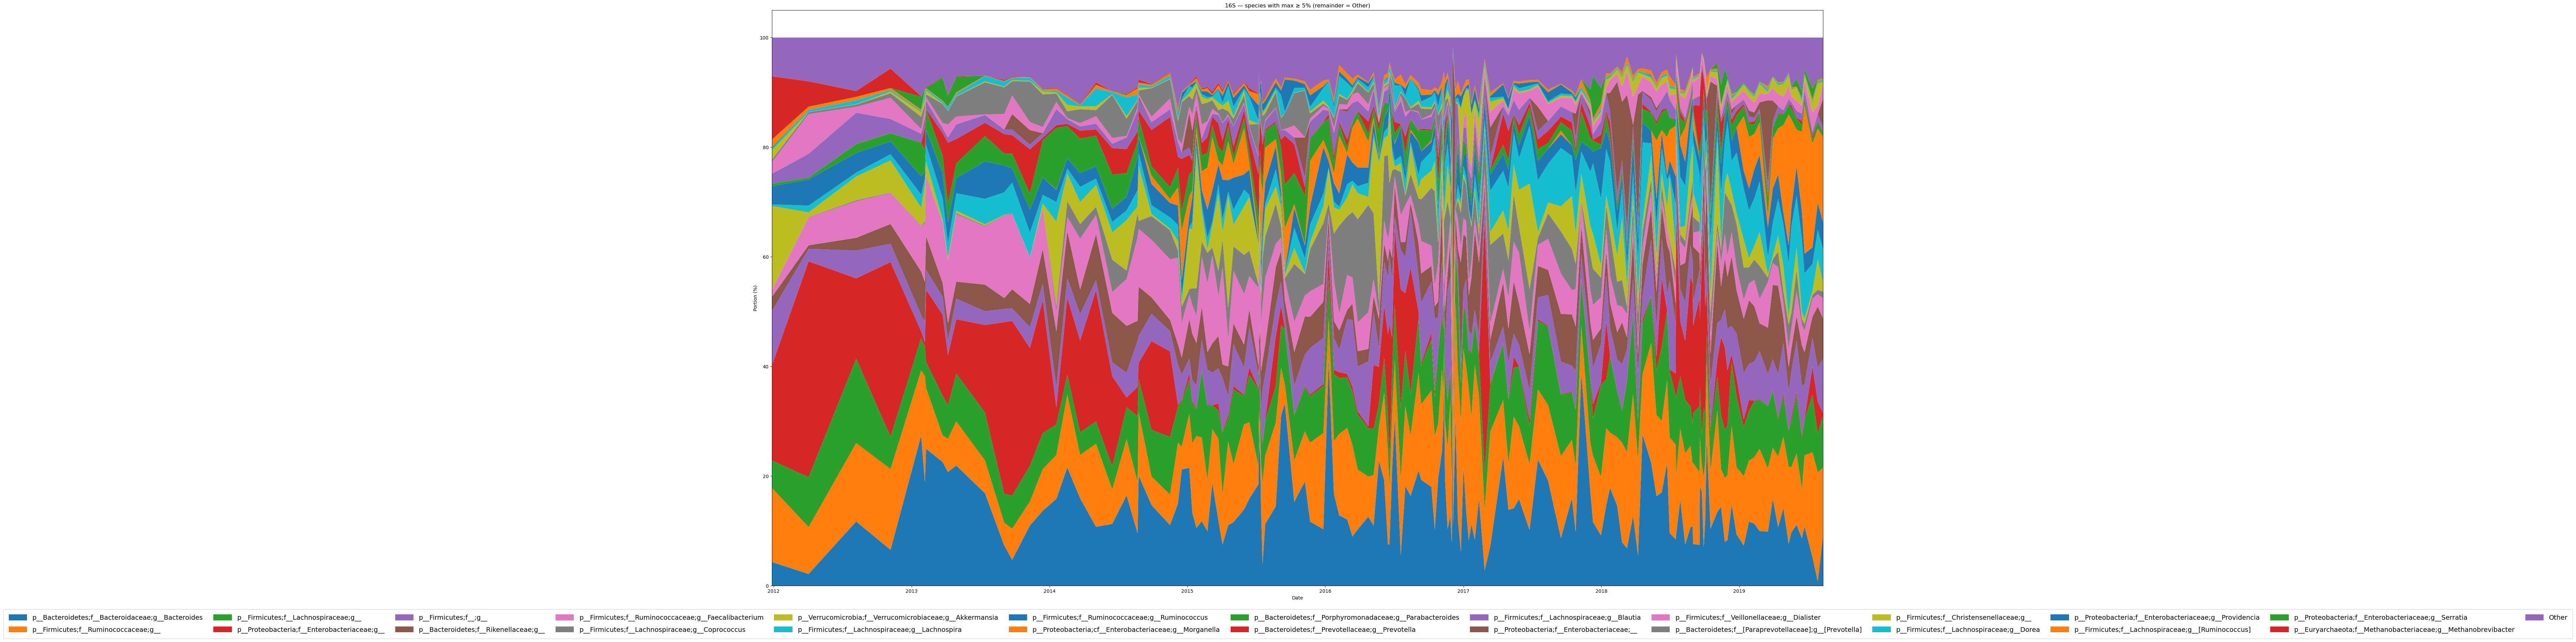

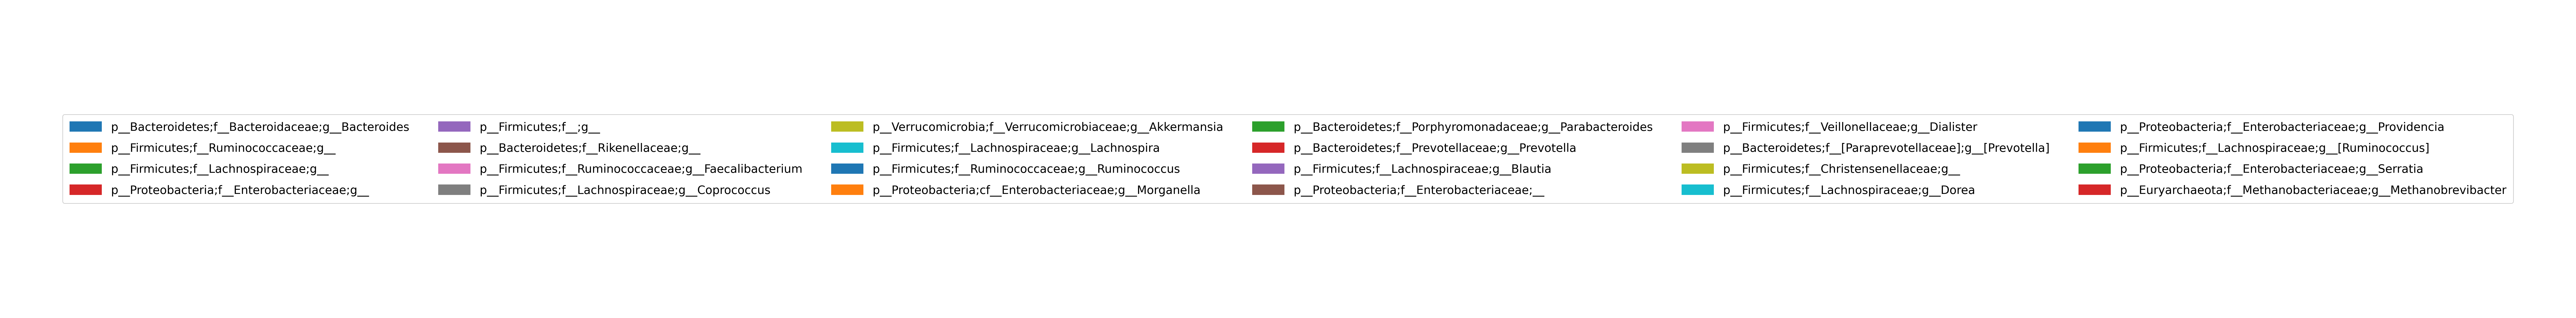

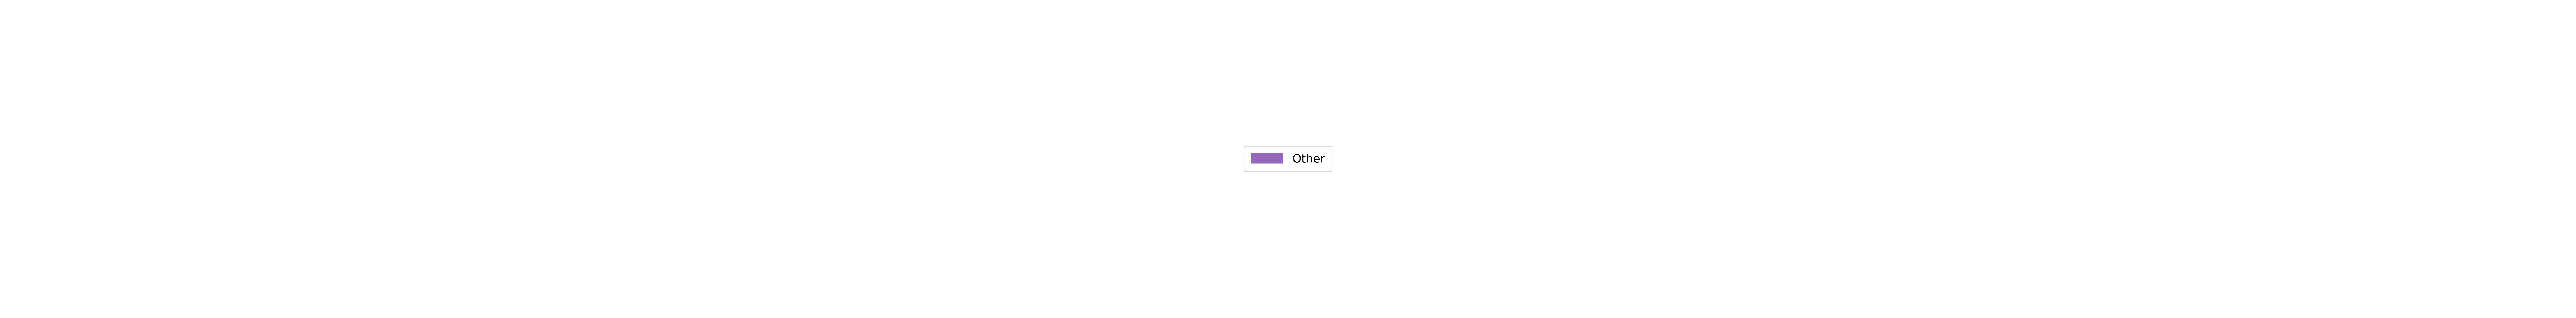

Saved 2 legend page(s) in: legend_16S_pages


In [55]:
# Ensure datetime and remove exact dupes on (Date, Species)
df_longMicrobiome["Date"] = pd.to_datetime(df_longMicrobiome["Date"], errors="coerce")
df_longMicrobiome = df_longMicrobiome.drop_duplicates(subset=["Date", "Species"], keep="first")

# Panel: 16S  (keep species with max >= 5%)
sub_16s = df_longMicrobiome.loc[
                                df_longMicrobiome["Panel"] == "16S", 
                                ["Date", "Species", "Abundance"]
].copy()

wide_16s = (sub_16s.pivot_table(
                                index="Date", 
                                columns="Species",
                                values="Abundance",
                                aggfunc="first"
                                ).sort_index()
                                .apply(pd.to_numeric, errors="coerce")
                                .fillna(0)
)

# Normalize to % per date
den_16s = wide_16s.sum(axis=1).replace(0, 1.0)
portion_16s = (wide_16s.div(den_16s, axis=0)) * 100

# Keep only species that reach ≥ 5% at least once
keep16 = portion_16s.columns[portion_16s.max(axis=0) >= 5].tolist()
portion16 = portion_16s[keep16].copy()

# Order stacks by average share so largest are at the bottom
order16 = portion16.mean(axis=0).sort_values(ascending=False).index
portion16 = portion16[order16]

# Remainder as "Other"
other16 = (100 - portion16.sum(axis=1)).clip(lower=0)
portion16_plot = portion16.assign(Other=other16)

# Plot
fig, ax = plt.subplots(figsize=(32, 18))

x16 = portion16_plot.index
y16 = portion16_plot.T.values
labels16 = portion16_plot.columns.tolist()

ax.stackplot(x16, *y16, labels=labels16)

ax.set_title("16S — species with max ≥ 5% (remainder = Other)")
ax.set_xlabel("Date")
ax.set_ylabel("Portion (%)")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.margins(x=0)

# Legend: larger, clearer, below the plot
handles, lab = ax.get_legend_handles_labels()
rows = 2 if len(lab) <= 40 else 3
ncols = math.ceil(len(lab) / rows)

leg = fig.legend(
                    handles, 
                    lab,
                    loc="lower center",
                    bbox_to_anchor=(0.5, -0.06 if rows == 2 else -0.10),
                    ncol=ncols,
                    fontsize=14,
                    frameon=True,
                    borderpad=0.8,
                    handlelength=2.8,
                    handleheight=1.0,
                    labelspacing=0.8,
                    columnspacing=1.6,
)
leg.get_frame().set_facecolor("white")
leg.get_frame().set_alpha(0.98)
leg.get_frame().set_linewidth(0.8)

# Extra space for legend block
fig.subplots_adjust(bottom=0.22 if rows == 2 else 0.30)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

# Grab labels/colors from your existing stackplot 'ax'
handles, labels = ax.get_legend_handles_labels()

# Build proxy patches so we don't reuse plot artists
proxies = []
for h in handles:
    try:
        fc = h.get_facecolor()
        color = fc[0] if hasattr(fc, "__len__") and len(fc) else fc
    except Exception:
        color = getattr(h, "get_color", lambda: "0.5")()
    proxies.append(mpatches.Patch(facecolor=color, edgecolor="none"))

# Make multi-page legend, each page same size as your previous legend
out_dir = "legend_16S_pages"
os.makedirs(out_dir, exist_ok=True)

rows, cols = 4, 6              # 4 rows × 6 columns per page 24 items/page
per_page = rows * cols
fontsize = 18                  # readable size; tweak if you want

# If the plot already has a legend, remove it so it won't overlap later.
try:
    ax.legend_.remove()
except Exception:
    pass

for page, start in enumerate(range(0, len(labels), per_page), 1):
    end = start + per_page
    sub_lab = labels[start:end]
    sub_proxy = proxies[start:end]

    fig_leg = plt.figure(figsize=(56, 7), dpi=220)   # SAME size, crisper DPI
    fig_leg.legend(
        sub_proxy, sub_lab,
        loc="center",
        ncol=cols,
        fontsize=fontsize,
        frameon=True, framealpha=1.0,
        borderpad=0.6,
        handlelength=2.8, handleheight=1.0,
        labelspacing=0.8,
        columnspacing=2.5,
    )
    plt.axis("off")
    plt.tight_layout()
    fig_leg.savefig(f"{out_dir}/legend_16S_p{page:02d}.png", bbox_inches="tight")
    plt.show()

print(f"Saved {math.ceil(len(labels)/per_page)} legend page(s) in: {out_dir}")

## Xin Fang MetaphlAN 2 Metagenomics Relative Abundance Stacked Area Chart

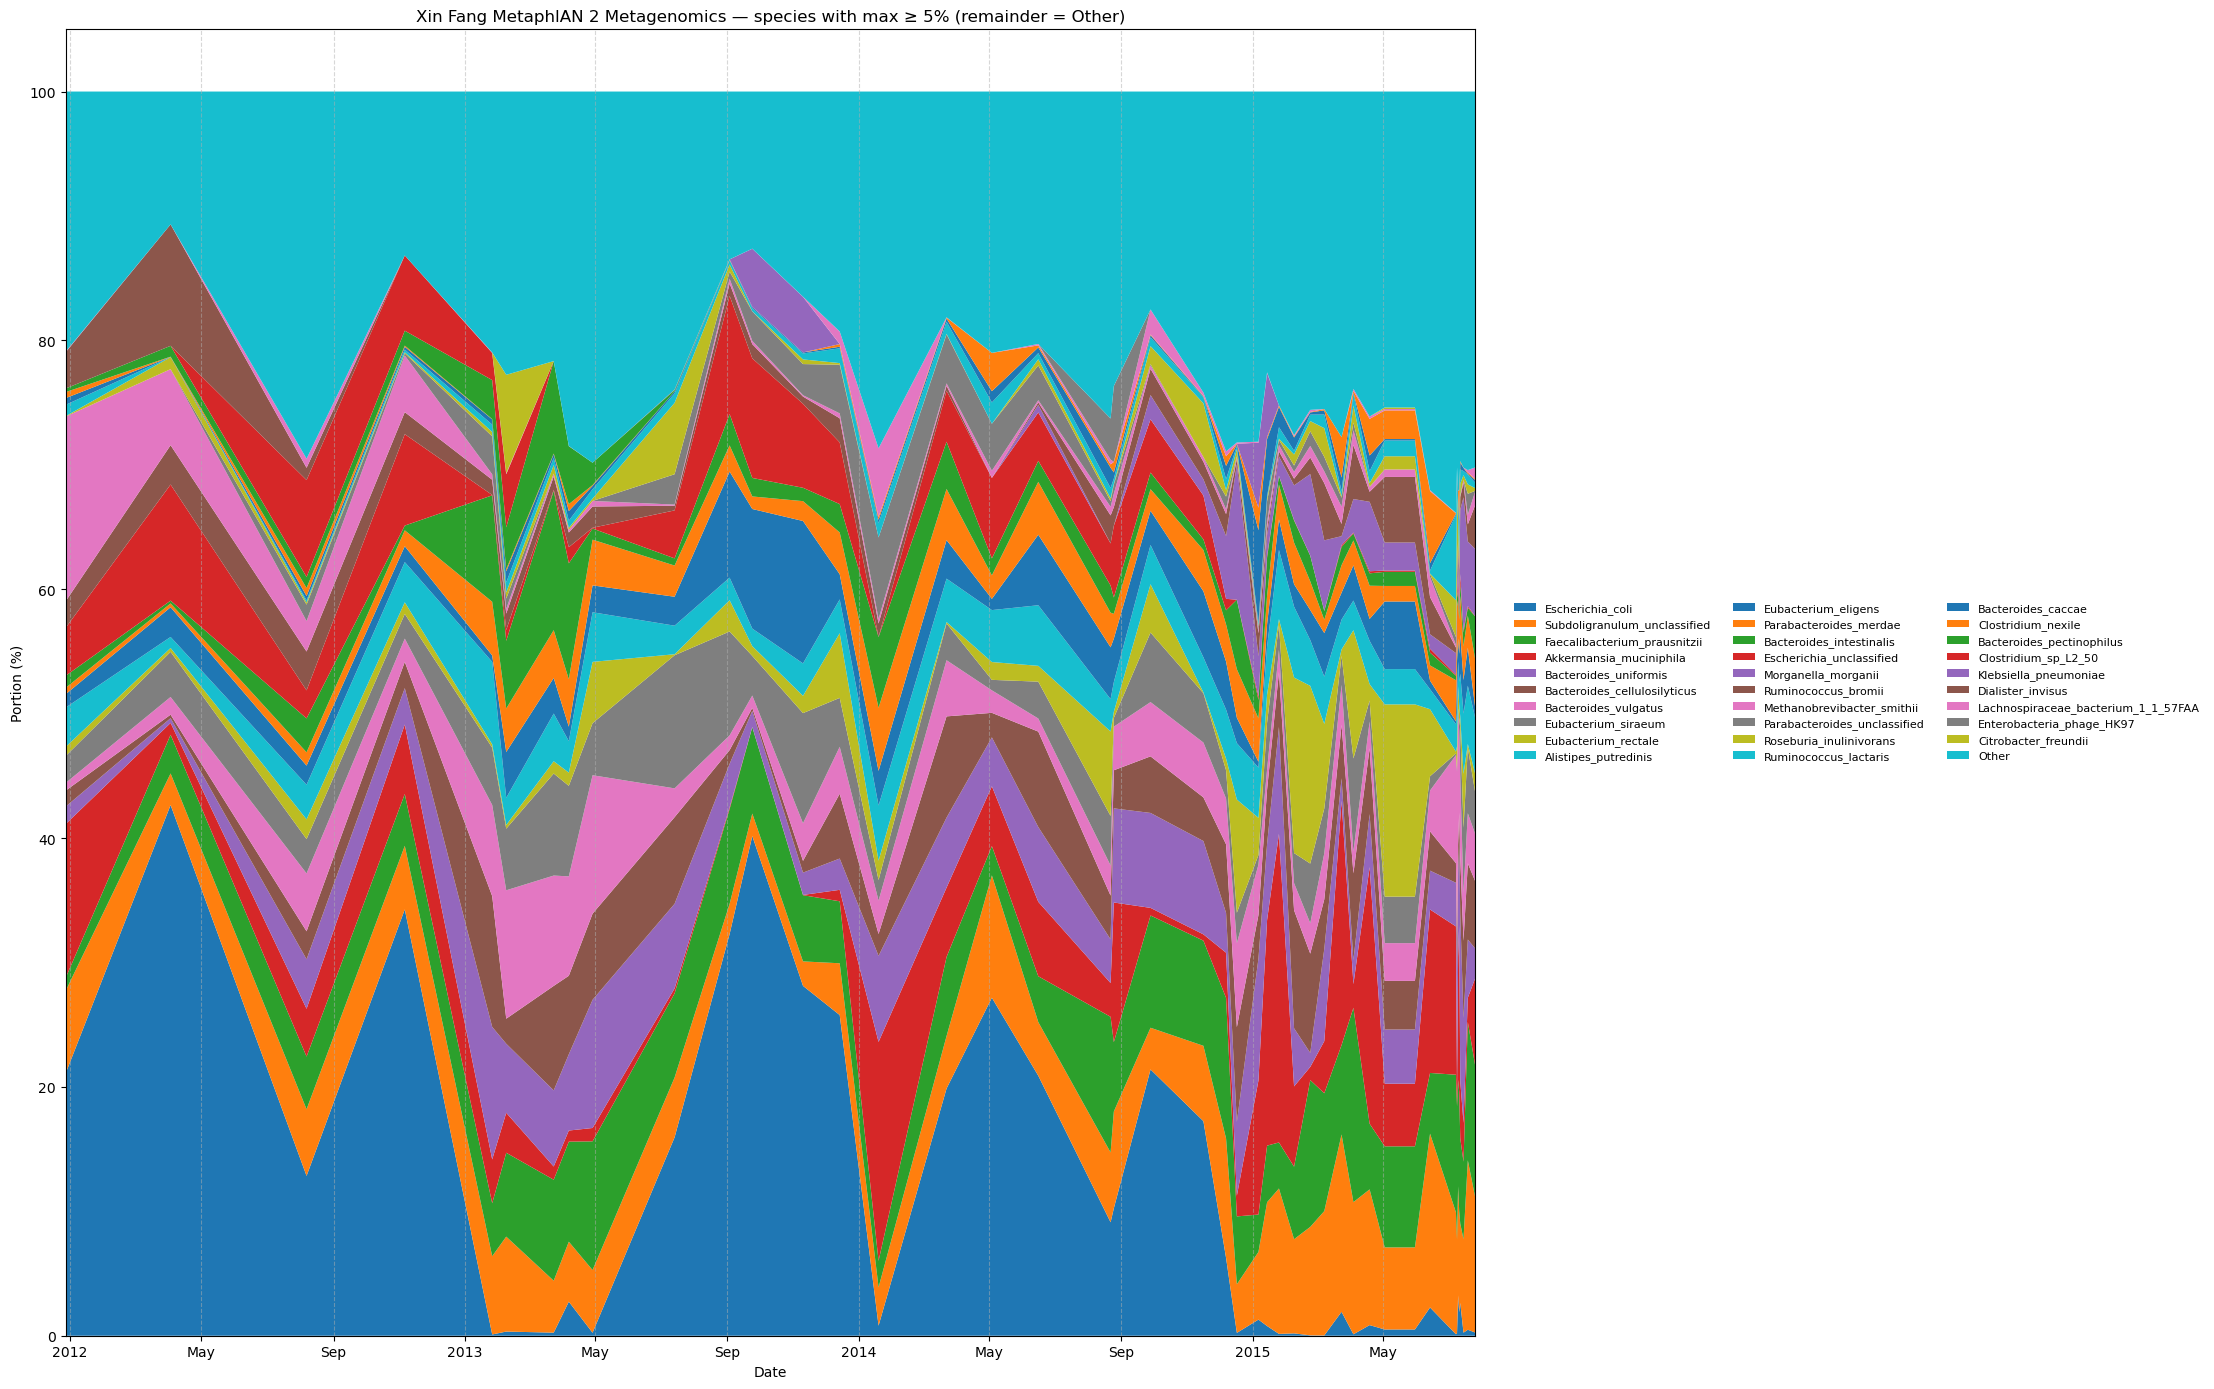

In [ ]:
# Panel: Xin Fang MetaphlAN 2 Metagenomics (keep species with max >= 5%)

sub_xf = df_longMicrobiome.loc[
                                (df_longMicrobiome["Panel"] == "Xin Fang MetaphlAN 2 Metagenomics")
                                & (df_longMicrobiome["Species"] != "Sum of Metagenomics Relative Abundances"),
                                ["Date", "Species", "Abundance"]
].copy()

wide_xf = (sub_xf.pivot_table(
                                index="Date", 
                                columns="Species", 
                                values="Abundance", 
                                aggfunc="first"
          ).sort_index()
          .apply(pd.to_numeric, errors="coerce")
          .fillna(0)
)

den_xf = wide_xf.sum(axis=1).replace(0, 1.0)
portion_xf = (wide_xf.div(den_xf, axis=0)) * 100

keepXF = portion_xf.columns[portion_xf.max(axis=0) >= 5].tolist()
portionXF = portion_xf[keepXF].copy()
orderXF = portionXF.mean(axis=0).sort_values(ascending=False).index
portionXF = portionXF[orderXF]

otherXF = (100 - portionXF.sum(axis=1)).clip(lower=0)
portionXF_plot = portionXF.assign(Other=otherXF)

plt.figure(figsize=(28, 14))
xXF = portionXF_plot.index
yXF = portionXF_plot.T.values
labelsXF = portionXF_plot.columns.tolist()

plt.stackplot(xXF, *yXF, labels=labelsXF)
plt.title("Xin Fang MetaphlAN 2 Metagenomics — species with max ≥ 5% (remainder = Other)")
plt.xlabel("Date")
plt.ylabel("Portion (%)")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.margins(x=0)
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), ncol=3, fontsize=8, frameon=False)
plt.tight_layout(rect=[0, 0, 0.80, 1])
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

Are there any trends here that have a relationship with the biomarker time series...